# Summary of EDA

## 1: Settings

### 1.1: Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import datetime as dt
import scipy.stats as ss

from itertools import product
from copy import deepcopy

### 1.2: Loading Data

In [2]:
# Connecting to database
conn = sqlite3.connect(r"./data/lung_cancer.db")

In [3]:
# Reading the data
MASTER_DF = pd.read_sql_query("SELECT * FROM lung_cancer", conn)

### 1.3: Configurations & Global Variables

In [4]:
# Settings
%matplotlib inline
pd.set_option("display.max_columns", None)

# Global Vars
CURR_DATE = dt.datetime.today()

## 2: Exploring the Data

### 2.1: Brief General Overview

In [5]:
MASTER_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10348 non-null  float64
 1   Age                     10348 non-null  int64  
 2   Gender                  10348 non-null  object 
 3   COPD History            9236 non-null   object 
 4   Genetic Markers         10348 non-null  object 
 5   Air Pollution Exposure  10345 non-null  object 
 6   Last Weight             10348 non-null  int64  
 7   Current Weight          10348 non-null  int64  
 8   Start Smoking           10348 non-null  object 
 9   Stop Smoking            10348 non-null  object 
 10  Taken Bronchodilators   9287 non-null   object 
 11  Frequency of Tiredness  10348 non-null  object 
 12  Dominant Hand           10348 non-null  object 
 13  Lung Cancer Occurrence  10348 non-null  int64  
dtypes: float64(1), int64(4), object(9)
mem

In [6]:
MASTER_DF.describe()

,ID,Age,Last Weight,Current Weight,Lung Cancer Occurrence
count,1.034800e+04,10348.000000,10348.000000,10348.000000,10348.000000
mean,1.150782e+18,61.222748,72.401044,69.416216,0.544066
std,6.673316e+17,23.708267,16.136498,16.880504,0.498078
min,4.137510e+13,-104.000000,45.000000,36.000000,0.000000
25%,5.654776e+17,54.000000,59.000000,56.000000,0.000000
50%,1.153193e+18,64.000000,72.000000,69.000000,1.000000
75%,1.721061e+18,74.000000,86.000000,82.000000,1.000000
max,2.305810e+18,120.000000,100.000000,115.000000,1.000000


In [7]:
MASTER_DF.head()

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


**Assumptions:**

1. Data is updated to current year 2024 => "Age"/"Stop Smoking" is updated to current year. 
- Reason: Since age is provided as a number instead of the birth date, I have to assume that the age is calculated using a formula (CURRENT_DATE - BIRTH_DATE) in the backend and updated accordingly as the date goes by. Likewise, this applies to Stop Smoking.
   
2. Each patient should only have one row with the latest updated data.
- Reason: There is no other date column in the data indicating when it is updated, indicating that the database is live and constantly refreshed with the latest data. 

3. Since data of number of packs the patient smokes in a period of time is not given, I would have to assume this case study will be working with the assumptions that they all smoke the same amount of packs in the same period of time. 

### 2.2: Duplicated Data

In [8]:
# Checking for duplicates
MASTER_DF.duplicated().any()

True

In [9]:
MASTER_DF[MASTER_DF.duplicated() == True]

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
9998,1.186573e+18,49,Female,Yes,Present,Medium,56,46,2013,Still Smoking,Yes,None / Low,Left,1
9999,1.948079e+18,80,Male,No,Not Present,Low,92,95,Not Applicable,Not Applicable,No,High,Right,1
10000,1.421010e+18,56,Female,No,Not Present,High,45,50,1999,2021,No,None / Low,Right,0
10001,1.630550e+18,89,Female,No,Present,High,84,87,1950,2020,No,Medium,Right,1
10002,3.915065e+17,51,Male,No,Not Present,High,83,88,2014,Still Smoking,No,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,6.202150e+17,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0
10344,1.157407e+18,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0
10345,1.488014e+18,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1
10346,3.987035e+17,69,Male,No,Not Present,High,81,75,2014,Still Smoking,No,Medium,Right,1


In [10]:
# Validating those rows are indeed duplicated
MASTER_DF[MASTER_DF.duplicated(keep=False) == True].sort_values("ID")

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
1271,9.360174e+15,65,Male,Yes,Present,Low,85,84,1995,2022,None,None / Low,RightBoth,0
10275,9.360174e+15,65,Male,Yes,Present,Low,85,84,1995,2022,None,None / Low,RightBoth,0
10290,1.788814e+16,61,Male,Yes,Not Present,High,94,93,Not Applicable,Not Applicable,Yes,None / Low,Right,1
658,1.788814e+16,61,Male,Yes,Not Present,High,94,93,Not Applicable,Not Applicable,Yes,None / Low,Right,1
10198,1.998191e+16,65,Female,Yes,Present,High,81,72,1994,Still Smoking,Yes,Medium,Right,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6908,2.285686e+18,69,Male,None,Not Present,Low,90,83,2015,Still Smoking,None,None / Low,Right,0
294,2.290146e+18,78,Male,Yes,Present,High,45,46,1980,2002,Yes,High,Right,1
10176,2.290146e+18,78,Male,Yes,Present,High,45,46,1980,2002,Yes,High,Right,1
10093,2.298460e+18,74,MALE,Yes,Not Present,Medium,91,95,2019,2019,Yes,None / Low,RightBoth,0


From above 2 output tables, we can identify that there are 350 duplicated rows that should be removed

In [11]:
# Removing duplicated rows and validation
print(f"MASTER_DF shape before removal: {MASTER_DF.shape}")
MASTER_DF.drop_duplicates(keep="first", inplace=True)
print(f"Any Duplicate Rows after removal: {MASTER_DF.duplicated().any()}")
print(f"MASTER_DF shape after removal: {MASTER_DF.shape}")

MASTER_DF shape before removal: (10348, 14)
Any Duplicate Rows after removal: False
MASTER_DF shape after removal: (9998, 14)


MASTER_DF shape from the info table above: (10348, 14)

MASTER_DF shape after removal of duplicated rows: (9998, 14)

350 rows are removed, validating the numbers of rows removed tally with the number of duplicated rows we discovered earlier.

### 2.3: Brief Univariable data breakdown

In [12]:
for col in MASTER_DF.columns[1:]:
	print(f"Column: {col}")
	print(f"{MASTER_DF[col].unique()}\n")

Column: Age
[  42   72   65   67   54   49   57   50   68   48   56   52   77   37
   78   74   53   70   61   45   63   47   84   59   76   79   71   69
  -61   60   41   73  110   66   88   29   18   40  -69   51   28   33
   91   83   34  -64   64   55   81   87   43   26   86   31   36   80
  -46   89   96   82   85   97   62   90   58   22   92   75   44   21
  100  103   95   38  -42   35   46   39  -49   93  101  -76  -65  -53
  -41  -84  -71   32  -55   99  -51  -87   27  -52  106   98   25  -80
  -54  -37  105  -74  108   20   94  -86  -72  -45  -77  -93  -40  102
  -81  -78   30   24  -90  -50  -66  -95  -68  -38 -101  -44  -82  -60
  -47  -56  115  -57  -73  120  -58  -75   23  -62  104  -79  -89  -88
  116  -43  107  -59  -33  -48  -98  -30  -70  -99  -92  -36 -100  -63
  -83 -104  -91]

Column: Gender
['Male' 'MALE' 'Female' 'FEMALE' 'NAN']

Column: COPD History
['No' 'Yes' None]

Column: Genetic Markers
['Not Present' 'Present']

Column: Air Pollution Exposure
['Medium' '

**Observations**

From the brief run through of the values above, it can be immediately highlighted that certain columns have values that require further investigation/manipulation:

1. Age column having negative values
2. Gender column having similar values ("Male" VS "MALE", "Female" VS "FEMALE) recorded with different cases
3. Gender column "NAN" value is string instead of a NULL type -> isnull() will not identify is as NULL type. 
4. Start Smoking/Stop Smoking columns are not numerical, have words like "Not Applicable" and "Still Smoking"
5. None values in multiple columns (Possible Missing Data)

#### Features Table Summary Breakdown

| Feature | Description | Type | Initial Remarks |
| - | - | - | - |
| ID | Patient ID | Numerical | Not meaningful as a feature as it only serves a patient identifier |
| Age | Age of the patient | Numerical | Contains negative values. Assumption: Calculated and Updated based on CURRENT_YEAR via birth date |
| Gender | Gender of the patient | Categorical | Need to format strings to ensure consistency in values |
| COPD History | Whether the patient has a history of Chronic Obstructive Pulmonary Disease | Categorical | Refer to additional notes below |
| Genetic Markers | Presence of any genetic markers known to increase the risk of lung cancer | Categorical | NIL |
| Air Pollution Exposure | Level of air pollution exposure in the patient’s daily life | Categorical | NIL |
| Last Weight | Last officially recorded weight of patient | Numerical | Might require feature engineering together with Current Weight |
| Current Weight | Current officially recorded weight of patient | Numerical | Might require feature engineering together with Last Weight |
| Start Smoking | Year that the patient starts smoking | String | Might require feature engineering together with Stop Smoking to be useful |
| Stop Smoking | Year that the patient stops smoking | String | Might require faeture engineering together with Start Smoking to be useful |
| Taken Bronchodilators | Whether the patient is previously prescribed Bronchodilator medications | Categorical | Refer to additional notes below |
| Frequency of Tiredness | Frequency of patient feeling tiredness in a day | Categorical | NIL |
| Dominant Hand | Dominant hand of the patient | Categorical | NIL |
| Lung Cancer Occurrence | Whether the patient has lung cancer or not | Categorical | Target Variable |


FURTHER RESEARCH TO UNDERSTAND FEATURES:

- Chronic obstructive pulmonary disease (COPD) is the name for a group of lung conditions that cause breathing difficulties. COPD is a common condition that mainly affects middle-aged or older adults who smoke. (Retrieved from https://www.nhs.uk/conditions/bronchodilators/). From the information retrieved, this could be an important feature to investigate further. 

- Bronchodilators are a type of medication that make breathing easier by relaxing the muscles in the lungs and widening the airways. It is often used to treat long-term conditions where the airways may become narrow and inflamed, an example of such conditions given was COPD. (Retrieved from https://www.nhs.uk/conditions/bronchodilators/). From the information retrieved, there seems to be some correlations between the features "Taken Bronchodilators" and "COPD History", this is something to be aware of as it might violate multicollinearity assumptions.

In [13]:
CAT_FEATURES = [
	"Gender",
	"COPD History",
	"Genetic Markers",
	"Air Pollution Exposure",
	"Taken Bronchodilators",
	"Frequency of Tiredness",
	"Dominant Hand"
]

NUM_FEATURES = [
	"Age",
	"Last Weight",
	"Current Weight"
]

**NOTE:**

I decided to leave out "Start Smoking", "Stop Smoking" for now since they require further manipulation/filters before being able to classify as a numerical features.

In [14]:
MASTER_DF.drop("ID", axis=1, inplace=True)
MASTER_DF.head(n=5)

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


**NOTE**

In the following sub-segment of 2.3: Data Columns Exploration, I will look into each of the issues highlighted earlier and make appropriate corrections/cleaning. 

#### 2.3.1: Age Column having negative values

Assumption(s): Age cannot be of negative values, thus it is highly likely that the values are simply entried wrongly and should just be the direct positive counterparts. 

In [15]:
MASTER_DF["Age"] = MASTER_DF["Age"].abs()
MASTER_DF["Age"].unique()

array([ 42,  72,  65,  67,  54,  49,  57,  50,  68,  48,  56,  52,  77,
        37,  78,  74,  53,  70,  61,  45,  63,  47,  84,  59,  76,  79,
        71,  69,  60,  41,  73, 110,  66,  88,  29,  18,  40,  51,  28,
        33,  91,  83,  34,  64,  55,  81,  87,  43,  26,  86,  31,  36,
        80,  46,  89,  96,  82,  85,  97,  62,  90,  58,  22,  92,  75,
        44,  21, 100, 103,  95,  38,  35,  39,  93, 101,  32,  99,  27,
       106,  98,  25, 105, 108,  20,  94, 102,  30,  24, 115, 120,  23,
       104, 116, 107], dtype=int64)

#### 2.3.2: Gender column similar values and "NAN"

To ensure consistency in the values for the gender, I decide on the changing all of them to lowercase and removing any extra spaces. 

For the "NAN" values, I converted them to None type such that these rows can be easily identified using the isnull() method in the event that further investigation or work is to be done with values.

In [16]:
MASTER_DF["Gender"] = [gender.lower().strip() if gender != "NAN" else None for gender in MASTER_DF["Gender"]]
MASTER_DF["Gender"].unique()

array(['male', 'female', None], dtype=object)

#### 2.3.3: None type data in multiple columns (Possible Missing Data)

In [17]:
COLS_WITH_MISSING_DATA = MASTER_DF.columns[MASTER_DF.isnull().sum(axis=0) > 0].tolist()

In [18]:
MASTER_DF[COLS_WITH_MISSING_DATA].isnull().mean().sort_values(ascending=False)

COPD History              0.108122
Taken Bronchodilators     0.102721
Air Pollution Exposure    0.000300
Gender                    0.000100
dtype: float64

NOTE: All of the columns identified here are of CATERGORICAL types.

In [19]:
MASTER_DF[MASTER_DF["COPD History"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
12,56,male,None,Not Present,High,69,67,1996,2021,None,None / Low,RightBoth,1
16,78,male,None,Not Present,Low,57,65,1994,2016,None,None / Low,Right,0
31,65,male,None,Present,Medium,56,63,1967,2020,None,Medium,Right,0
33,70,male,None,Present,High,73,76,1995,2014,None,High,RightBoth,1
37,76,male,None,Not Present,High,52,47,2012,2017,No,Medium,Right,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,78,male,None,Not Present,Low,54,56,2006,2015,Yes,None / Low,Left,0
9942,64,female,None,Present,High,48,39,2015,2023,No,Medium,Left,1
9950,52,female,None,Not Present,High,65,60,2002,2017,Yes,None / Low,Right,1
9965,51,female,None,Not Present,High,93,104,1992,2020,No,Medium,Right,0


In [20]:
MASTER_DF[MASTER_DF["Air Pollution Exposure"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
2560,59,male,None,Present,None,65,70,1995,1995,None,High,Right,0
4662,71,male,No,Present,None,49,50,1953,Still Smoking,No,Medium,Left,0
8432,55,male,No,Not Present,None,56,62,2008,2021,No,Medium,Right,0


In [21]:
MASTER_DF[MASTER_DF["Gender"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
3078,74,None,Yes,Not Present,High,97,100,1960,Still Smoking,Yes,High,Left,1


As of this moment, it is hard to determine an appropriate imputation for these variables without further understanding their relationship with the target variables as well as each other, thus I decide to leave it as they are for now and move on to delving deeper into their numbers before making the appropriate decisions. 

### 2.4: Target (Response Variable) and Multivariables Visualization Study

#### 2.4.1: TARGET VARIABLE (Lung Cancer Occurrence)

In [22]:
MASTER_DF["Lung Cancer Occurrence"].value_counts()

Lung Cancer Occurrence
1    5439
0    4559
Name: count, dtype: int64

Percentage Present: 45.6%
Not Present: 54.4%


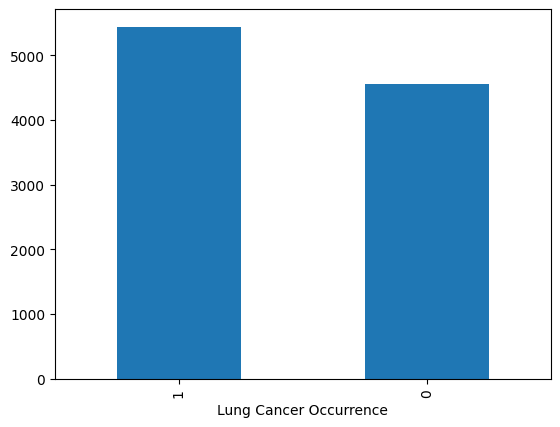

In [23]:
MASTER_DF["Lung Cancer Occurrence"].value_counts().plot(kind="bar")
Percentage_Present = round((MASTER_DF["Lung Cancer Occurrence"].value_counts()[0]/len(MASTER_DF["Lung Cancer Occurrence"])) * 100, 2)
print(f'Percentage Present: {Percentage_Present}%')
print(f'Not Present: {100 - Percentage_Present}%')

**Observations**

The distribution of data between patients with and without Lung Cancer is almost close to a 50/50 split, as such we do not need to oversample or make additional changes increase the data of one of the classes. 

#### 2.4.2: NUMERICAL FEATURES

In [24]:
# Summary statistics
NUM_DATA = MASTER_DF.drop("Lung Cancer Occurrence", axis=1).select_dtypes(include="number")
NUM_DATA.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9998.0,64.059412,14.253842,18.0,54.0,64.0,74.0,120.0
Last Weight,9998.0,72.383877,16.135922,45.0,59.0,72.0,86.0,100.0
Current Weight,9998.0,69.407982,16.878405,36.0,56.0,69.0,82.0,115.0


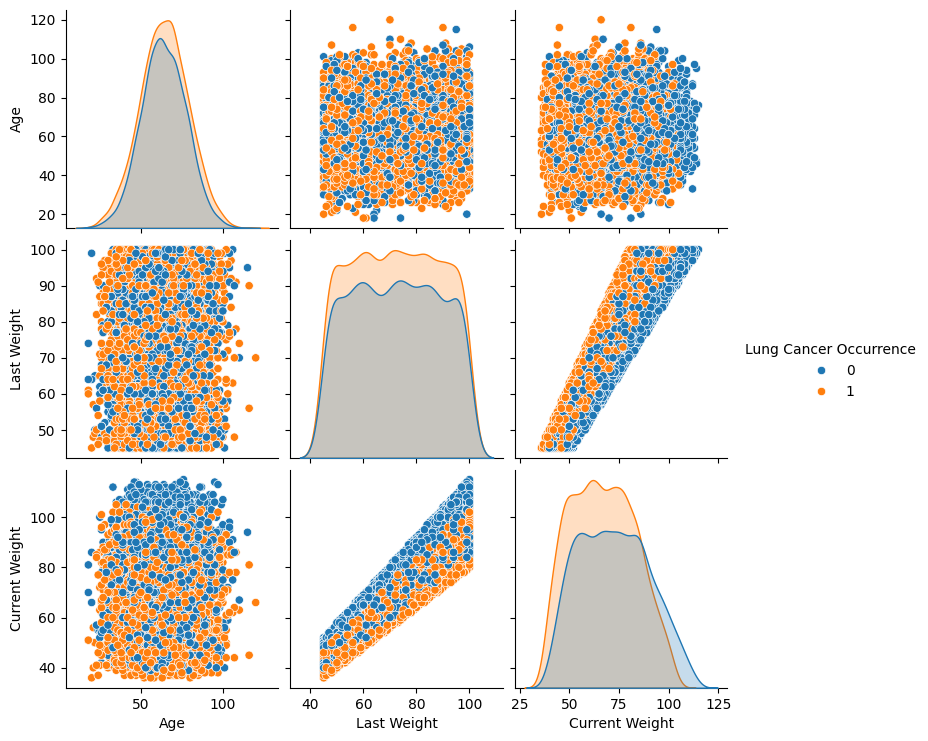

In [25]:
sns.pairplot(data=MASTER_DF, hue = "Lung Cancer Occurrence")

<Axes: xlabel='None', ylabel='Count'>

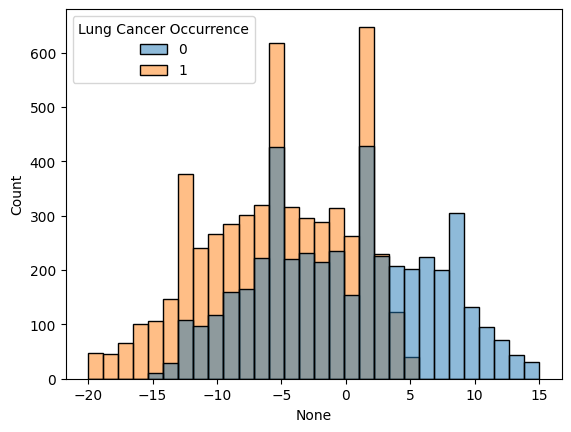

In [26]:
# Weight Change
sns.histplot(data=MASTER_DF, x=(MASTER_DF["Current Weight"] - MASTER_DF["Last Weight"]), hue = "Lung Cancer Occurrence", bins=30)

**Observations**

UNARY (Pairplot)
1. For "Age" column, it can be observed that the distribution is approximately normal and the lung cancer occurrence data distribution for both present and not present share the same distribution. 
2. For "Last Weight" column, it can be observed the distribution of patients with lung cancer occurrence tend to have higher weight as compared to those without by a rather significant margin of about 10%. 
3. For "Current Weight" column, it can be observed that the distribution of patients with lung cancer occurrence is slightly skewed towards lower weight as compared to those without, indicating that weight loss could be a potential symptom of lung cancer. 

BINARY
1. "Age" and the 2 weight columns seem to have a random relationship.
2. From the "Last Weight" and "Current Weight" relationship columns, combining the pairplot with the histogram, it can be clearly observed that the patients with lung cancer tend to suffer from weight loss, affirming our earlier observation from looking at current weight distributions. 

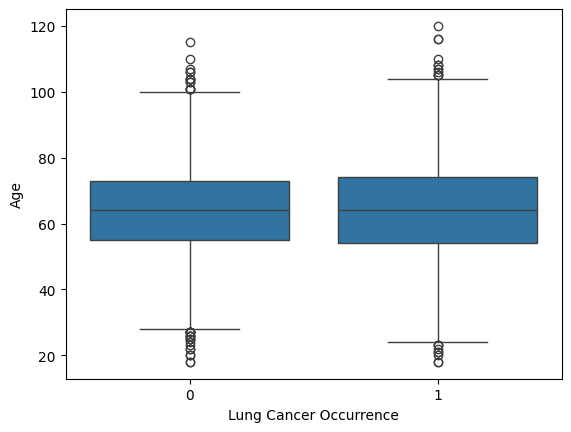

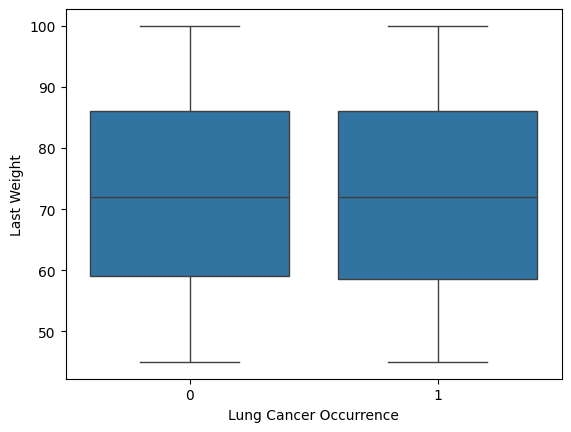

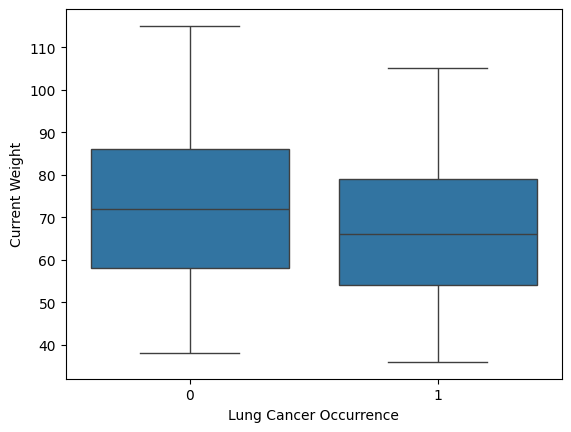

In [27]:
for feature in NUM_FEATURES:
	sns.boxplot(data=MASTER_DF, x="Lung Cancer Occurrence", y = feature)
	plt.show()

**Observations**

1. Multiple Outliers are observed in the Age column, however, these values are not extreme (do not skew the graph significantly) and still in the realm of logic, thus there is no need to remove them as of now. 
2. It can be observed that the distribution of the data is the same for both "Age" and "Last Weight", however for "Current Weight" it can be observed that those with positive outcome for lung cancer occurrrence tend to have a lower weight as compared to those with negative outcome. 

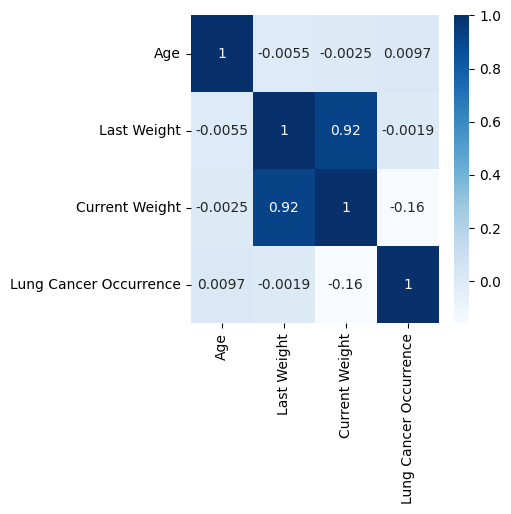

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))
corr = MASTER_DF[NUM_FEATURES+['Lung Cancer Occurrence']].corr()
cmap = sns.color_palette('Blues', as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True);

**Observations**

Clearly, "Last Weight" and "Current Weight" have high correlations as I would expect as a person's weight is unlikely to change significantly given normal circumstances (Some evidence earlier lung cancer leads to decrease in weight). As such, to prevent multicollinearity, this 2 columns would definetely have to be be further combined into a more meaningful feature if we are to consider using it in the model.

#### 2.4.3: CATEGORICAL FEATURES

In [29]:
MASTER_DF[CAT_FEATURES].describe(include="object").T

,count,unique,top,freq
Gender,9997,2,male,5778
COPD History,8917,2,Yes,5500
Genetic Markers,9998,2,Not Present,7519
Air Pollution Exposure,9995,3,High,6071
Taken Bronchodilators,8971,2,Yes,5549
Frequency of Tiredness,9998,3,None / Low,4647
Dominant Hand,9998,3,Right,6671


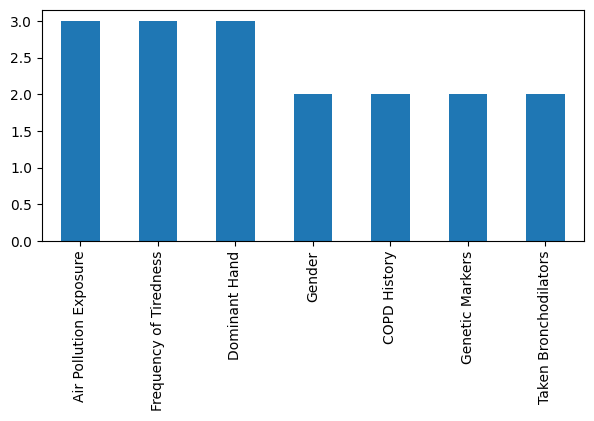

In [30]:
# Cardinality
MASTER_DF[CAT_FEATURES].nunique().sort_values(ascending=False).plot(kind='bar', figsize=(7, 3));

**Observations**

It can be observe that there aren't any categoricals that take too many types of values, so there is no need to handle high cardinality. It will be good for us to take note if there are any rare labels in this variables. 

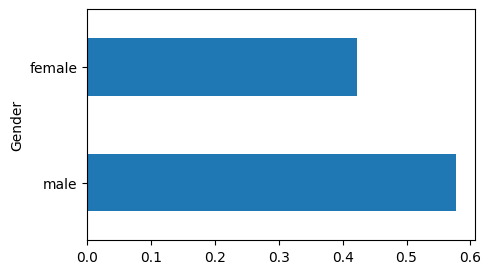

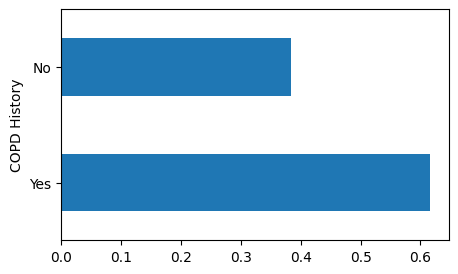

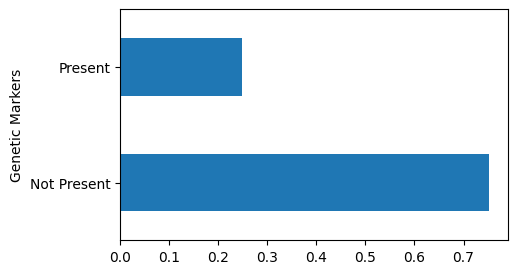

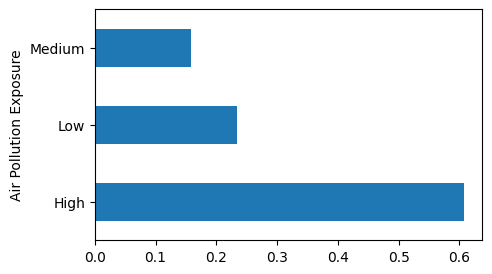

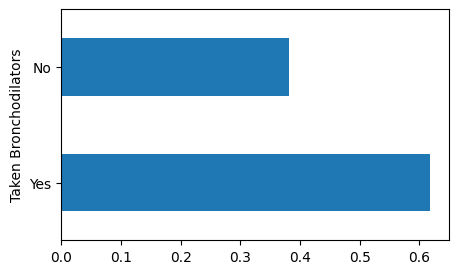

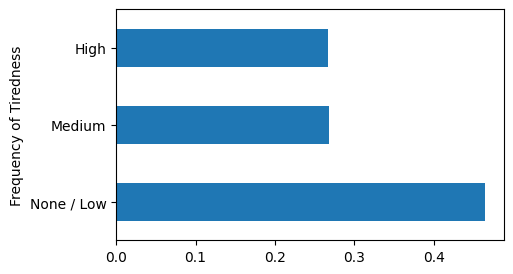

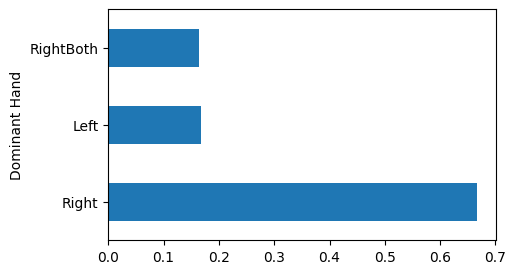

In [31]:
for feature in CAT_FEATURES:
	MASTER_DF[feature].value_counts(normalize=True).plot(kind="barh", figsize=(5, 3))
	plt.show()

**Observations**

While there is no presence of any rare labels in the any of the catergorical features, some of them do have a significant dominant label. 

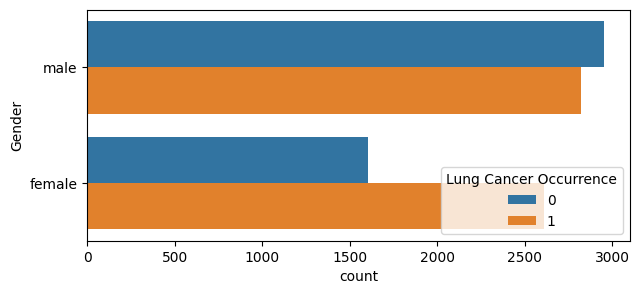

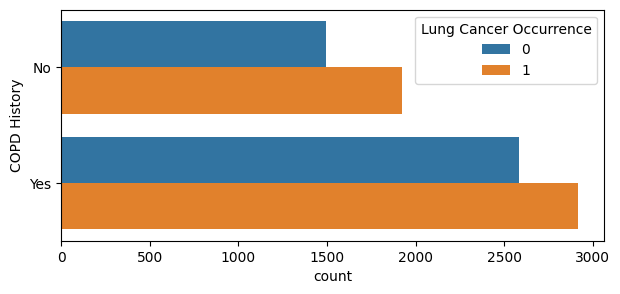

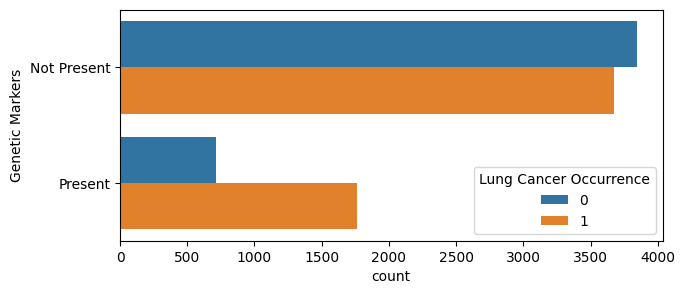

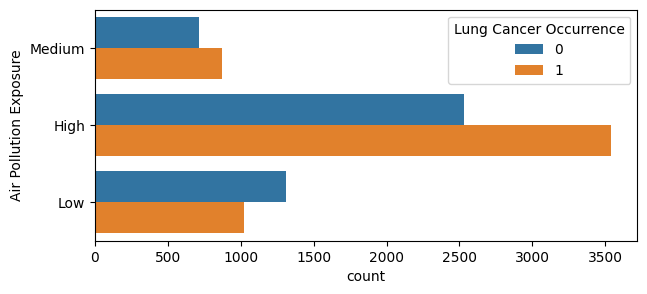

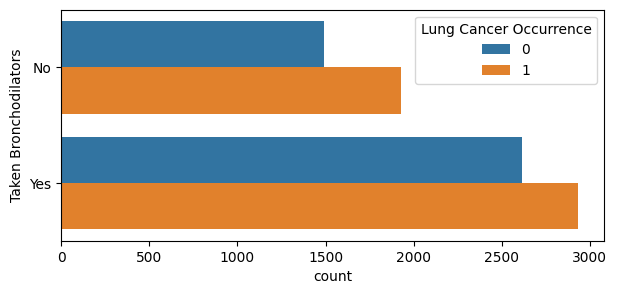

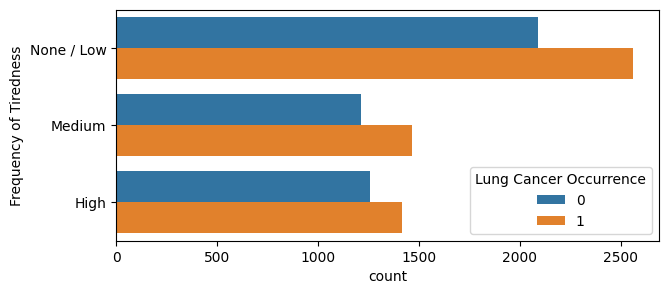

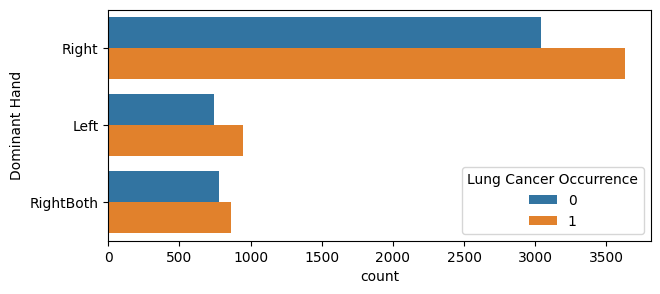

In [32]:
for feature in CAT_FEATURES:
	fig, ax = plt.subplots(figsize=(7, 3))
	sns.countplot(data=MASTER_DF, y=feature, orient="h", hue="Lung Cancer Occurrence")
	plt.show()

**Observations**

- Gender
 
From the graph, it can be observed that there is a higher proportion of female with lung cancer as compared to those without, while the proportion for males is relatively equal split. 

- Genetic Markers

From the graph, based on the significant portion of patients with genetic markers having lung cancer, it appears that those with genetic markers are more likely to be diagnose with lung cancer as compared to those without. 

- Air Pollution Exposure

From the graph, there are higher proportion of patients that are in high air pollution areas being diagnose with lung cancer as compared to other low and medium. 

- COPD History, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand

From the graph, the proportion is relatively similar for the different labels. 


As such, Gender, Genetic Markers and Air Pollution Exposure seem to be the more interesting features to look at in determining whether a patient will be diagnose with lung cancer. 

In [33]:
# Correlation Analysis Between Categorical Variables
CAT_CORR_DF = MASTER_DF[CAT_FEATURES].dropna()
CAT_VAR_PROD = list(product(CAT_FEATURES, CAT_FEATURES, repeat = 1))
result = []

# p-value
for x, y in CAT_VAR_PROD:
	if x != y:
		result.append((x , y,list(ss.chi2_contingency(pd.crosstab(CAT_CORR_DF[x], CAT_CORR_DF[y])))[1]))

chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "coeff"])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,Air Pollution Exposure,COPD History,Dominant Hand,Frequency of Tiredness,Gender,Genetic Markers,Taken Bronchodilators
var1,,,,,,,
Air Pollution Exposure,NaN,2.585825e-13,0.182672,1.922911e-03,1.371932e-22,2.823404e-58,2.585825e-13
COPD History,2.585825e-13,NaN,0.837776,3.203564e-125,3.434579e-01,2.245421e-23,0.000000e+00
Dominant Hand,1.826721e-01,8.377763e-01,NaN,7.180514e-02,7.600255e-02,7.575437e-01,8.377763e-01
Frequency of Tiredness,1.922911e-03,3.203564e-125,0.071805,NaN,1.802397e-09,3.434739e-19,3.203564e-125
Gender,1.371932e-22,3.434579e-01,0.076003,1.802397e-09,NaN,2.698204e-107,3.434579e-01
Genetic Markers,2.823404e-58,2.245421e-23,0.757544,3.434739e-19,2.698204e-107,NaN,2.245421e-23
Taken Bronchodilators,2.585825e-13,0.000000e+00,0.837776,3.203564e-125,3.434579e-01,2.245421e-23,NaN


In [34]:
printed = set()

for var1, var2, pvalue in result:
	if (pvalue < 0.05) and (((var1, var2) not in printed) or ((var2, var1) not in printed)):
		printed.add((var1, var2))
		print(f'{(var1, var2, pvalue)}')

('Gender', 'Genetic Markers', 2.6982040686809717e-107)
('Gender', 'Air Pollution Exposure', 1.3719319650883106e-22)
('Gender', 'Frequency of Tiredness', 1.8023966681014587e-09)
('COPD History', 'Genetic Markers', 2.245420591549313e-23)
('COPD History', 'Air Pollution Exposure', 2.5858250740089397e-13)
('COPD History', 'Taken Bronchodilators', 0.0)
('COPD History', 'Frequency of Tiredness', 3.2035644953001655e-125)
('Genetic Markers', 'Gender', 2.6982040686809717e-107)
('Genetic Markers', 'COPD History', 2.245420591549313e-23)
('Genetic Markers', 'Air Pollution Exposure', 2.8234037985028566e-58)
('Genetic Markers', 'Taken Bronchodilators', 2.245420591549313e-23)
('Genetic Markers', 'Frequency of Tiredness', 3.4347392189195616e-19)
('Air Pollution Exposure', 'Gender', 1.3719319650883207e-22)
('Air Pollution Exposure', 'COPD History', 2.5858250740089387e-13)
('Air Pollution Exposure', 'Genetic Markers', 2.8234037985028566e-58)
('Air Pollution Exposure', 'Taken Bronchodilators', 2.58582507

### 2.5: Validating Features Data

##### 2.5.1: Start/Stop Smoking Period

To ensure that the data is consistent, I decide to check that the features "Start Smoking" and "Stop Smoking" obey the following rules:

1. If "Start Smoking" is "Not Applicable", then "Stop Smoking" must be "Not Applicable"
2. If "Stop Smoking" is "Still Smoking", then "Start Smoking" must not be "Not Applicable"
3. "Start Smoking" <= "Stop Smoking"

In [35]:
error_idx = []

for row in range(len(MASTER_DF)):
	start, stop = MASTER_DF.iloc[row]["Start Smoking"], MASTER_DF.iloc[row]["Stop Smoking"]
	# Condition 1 
	if start == "Not Applicable" and stop != "Not Applicable":
		# Add index to errorneous list
		error_idx += [row]
	# Condition 2
	if stop == "Still Smoking" and start == "Not Applicable":
		error_idx += [row]
	# Condition 3
	if start > stop:
		error_idx += [row]

MASTER_DF.iloc[error_idx]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence


No issues are detected with the record of start and stop smoking

##### 2.5.2: Age VS Start Smoking

To investigate if there are any impossible/weird values that might require further attention between these variables.

Assumption: Age specified in the table is updated automatically to match the current year

In [36]:
age_start_subdf = MASTER_DF[["Age", "Start Smoking"]][MASTER_DF["Start Smoking"] != "Not Applicable"].copy()
age_start_subdf["Age"] = age_start_subdf["Age"].astype(int)
age_start_subdf["Start Smoking"] = age_start_subdf["Start Smoking"].astype(int)
# Considering the assumption made at the start that the age updates automatically
age_start_subdf["Year Born"] = [(CURR_DATE.year - age) for age in age_start_subdf["Age"]]
age_start_subdf["Age_started_smoking"] = (age_start_subdf["Start Smoking"] - age_start_subdf["Year Born"])
age_start_subdf.head(n=5)

,Age,Start Smoking,Year Born,Age_started_smoking
0,42,2015,1982,33
1,72,2006,1952,54
2,65,1998,1959,39
3,67,2011,1957,54
4,54,1994,1970,24


(array([ 143.,  296.,  472.,  626.,  768.,  927., 1096., 1239., 1416.,
        1563., 1716., 1883., 2012., 2188., 2337., 2498., 2673., 2995.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18.]),
 <BarContainer object of 18 artists>)

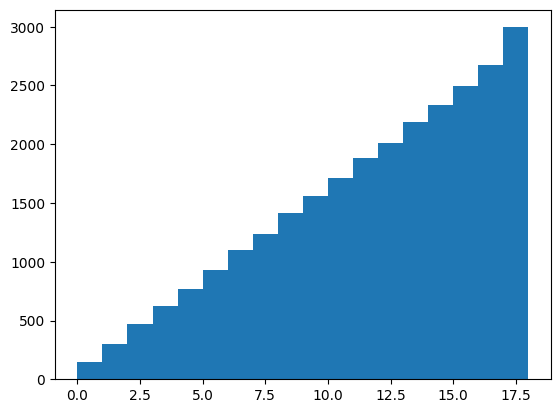

In [37]:
under_18 = age_start_subdf[age_start_subdf["Age_started_smoking"] <= 18].sort_values(by="Age_started_smoking" ,ascending=True).reset_index(drop=True)
plt.hist(under_18["Age_started_smoking"], bins=18, cumulative=True)

In [38]:
print(f'Smoking under 18: {len(under_18[under_18["Age_started_smoking"] <= 18])}')
print(f'Smoking under 12: {len(under_18[under_18["Age_started_smoking"] <= 12])}')
print(f'Smoking under 6: {len(under_18[under_18["Age_started_smoking"] <= 6])}')
print(f'Smoking under 3: {len(under_18[under_18["Age_started_smoking"] <= 3])}')
print(f'Smoking at Birth: {len(under_18[under_18["Age_started_smoking"] < 1])}')

Smoking under 18: 2995
Smoking under 12: 2012
Smoking under 6: 1096
Smoking under 3: 626
Smoking at Birth: 143


From the investigation above, it is observed quite a number of the patients are smoking below 18 years old. While it is possible and common nowadays that people are smoking below the age by legal laws, it is irregular that a substanial portion of the patients are smoking under 6 years old, or even more ridiculous at birth. Given the assumptions I made regarding the age, it is only possible for me to underestimate the year that the person was born in by a year, thus we have to re-evaluate the reliability of the data recorded here for "Start Smoking" after looking into the relationships between the data.

### 2.6: Missing Data and Imputation

In [39]:
MASTER_DF[COLS_WITH_MISSING_DATA].isnull().mean().sort_values(ascending=False)
IMPUTED_DF = deepcopy(MASTER_DF)

#### 2.6.1: Imputing Gender Values using mode of other rows with the similar values for other categorical features

In [40]:
IMPUTED_DF[IMPUTED_DF["Gender"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
3078,74,None,Yes,Not Present,High,97,100,1960,Still Smoking,Yes,High,Left,1


In [41]:
IMPUTED_DF[ \
	(IMPUTED_DF["COPD History"] == "Yes") & \
	(IMPUTED_DF["Genetic Markers"] == "Not Present") & \
    	(IMPUTED_DF["Air Pollution Exposure"] == "High") & \
	(IMPUTED_DF["Taken Bronchodilators"] == "Yes") & \
	(IMPUTED_DF["Frequency of Tiredness"] == "High") & \
	(IMPUTED_DF["Dominant Hand"] == "Left")
    ]["Gender"].value_counts()

Gender
male      74
female    29
Name: count, dtype: int64

In [42]:
IMPUTED_DF.at[3078, 'Gender'] = IMPUTED_DF[ \
	(IMPUTED_DF["COPD History"] == "Yes") & \
	(IMPUTED_DF["Genetic Markers"] == "Not Present") & \
	(IMPUTED_DF["Air Pollution Exposure"] == "High") & \
	(IMPUTED_DF["Taken Bronchodilators"] == "Yes") & \
	(IMPUTED_DF["Frequency of Tiredness"] == "High") & \
	(IMPUTED_DF["Dominant Hand"] == "Left")]\
	["Gender"].mode()[0]
IMPUTED_DF.iloc[3078]

Age                                  74
Gender                             male
COPD History                        Yes
Genetic Markers             Not Present
Air Pollution Exposure             High
Last Weight                          97
Current Weight                      100
Start Smoking                      1960
Stop Smoking              Still Smoking
Taken Bronchodilators               Yes
Frequency of Tiredness             High
Dominant Hand                      Left
Lung Cancer Occurrence                1
Name: 3078, dtype: object

#### 2.6.2: Imputing Air Pollution Exposure using mode

In [43]:
IMPUTED_DF[IMPUTED_DF["Air Pollution Exposure"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
2560,59,male,None,Present,None,65,70,1995,1995,None,High,Right,0
4662,71,male,No,Present,None,49,50,1953,Still Smoking,No,Medium,Left,0
8432,55,male,No,Not Present,None,56,62,2008,2021,No,Medium,Right,0


In [44]:
IMPUTED_DF[ \
	(IMPUTED_DF["COPD History"] == "No") & \
	(IMPUTED_DF["Taken Bronchodilators"] == "No") & \
	(IMPUTED_DF["Gender"] == "male")
    ]["Air Pollution Exposure"].value_counts()

Air Pollution Exposure
High      1246
Medium     292
Low        278
Name: count, dtype: int64

In [45]:
for row_num in IMPUTED_DF[IMPUTED_DF["Air Pollution Exposure"].isnull()].index:
	IMPUTED_DF.at[row_num, 'Air Pollution Exposure'] = "High"
	print(IMPUTED_DF.iloc[row_num])

Age                            59
Gender                       male
COPD History                 None
Genetic Markers           Present
Air Pollution Exposure       High
Last Weight                    65
Current Weight                 70
Start Smoking                1995
Stop Smoking                 1995
Taken Bronchodilators        None
Frequency of Tiredness       High
Dominant Hand               Right
Lung Cancer Occurrence          0
Name: 2560, dtype: object
Age                                  71
Gender                             male
COPD History                         No
Genetic Markers                 Present
Air Pollution Exposure             High
Last Weight                          49
Current Weight                       50
Start Smoking                      1953
Stop Smoking              Still Smoking
Taken Bronchodilators                No
Frequency of Tiredness           Medium
Dominant Hand                      Left
Lung Cancer Occurrence                0
Name: 4662, 

In [46]:
IMPUTED_DF[IMPUTED_DF["Air Pollution Exposure"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence


#### 2.6.3: Imputing COPD History and Taken Bronchodilattors

From the research done into these 2 values, I would suspect that they are highly related with the following relationship:

"COPD History" == "Yes" => "Taken Bronchodilators" == "Yes"

Therefore,

"Taken Bronchodilators" == "No" => "COPD History" == "No"

In [47]:
IMPUTED_DF[IMPUTED_DF["Taken Bronchodilators"] == "No"]["COPD History"].value_counts()

COPD History
No    3207
Name: count, dtype: int64

In [48]:
IMPUTED_DF[IMPUTED_DF["Taken Bronchodilators"] == "Yes"]["COPD History"].value_counts()

COPD History
Yes    5202
Name: count, dtype: int64

The data supports the assumptions made for "Taken Bronchodilators" == "No" => "COPD History" == "No". Counter checking the other side of data, it seems that for patients that have "Taken Bronchodilators" == "Yes", all of them do have "COPD History" in this case. Thus, even though the statement does not support the later, I will proceed to impute accordingly based on the mode of the data.

The reverse relationship is likely to be True. So I will proceed to impute "Taken Bronchodilators" as well using this methodology. 

In [49]:
for row_num in IMPUTED_DF[IMPUTED_DF["COPD History"].isnull()].index:
	if IMPUTED_DF.at[row_num, 'Taken Bronchodilators'] == "Yes":
		IMPUTED_DF.at[row_num, 'COPD History'] = "Yes"
	elif IMPUTED_DF.at[row_num, 'Taken Bronchodilators'] == "No":
		IMPUTED_DF.at[row_num, 'COPD History'] = "No"
	else:
		continue

for row_num in IMPUTED_DF[IMPUTED_DF["Taken Bronchodilators"].isnull()].index:
	if IMPUTED_DF.at[row_num, 'COPD History'] == "Yes":
		IMPUTED_DF.at[row_num, 'Taken Bronchodilators'] = "Yes"
	elif IMPUTED_DF.at[row_num, 'COPD History'] == "No":
		IMPUTED_DF.at[row_num, 'Taken Bronchodilators'] = "No"
	else:
		continue

In [50]:
IMPUTED_DF[IMPUTED_DF["COPD History"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
12,56,male,None,Not Present,High,69,67,1996,2021,None,None / Low,RightBoth,1
16,78,male,None,Not Present,Low,57,65,1994,2016,None,None / Low,Right,0
31,65,male,None,Present,Medium,56,63,1967,2020,None,Medium,Right,0
33,70,male,None,Present,High,73,76,1995,2014,None,High,RightBoth,1
47,67,male,None,Not Present,High,82,79,1980,2021,None,Medium,Left,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,73,female,None,Present,High,72,72,1996,1999,None,High,Right,1
9866,64,female,None,Present,High,76,71,1998,Still Smoking,None,Medium,Right,1
9874,59,female,None,Present,High,87,80,2016,2016,None,None / Low,Right,1
9889,44,female,None,Not Present,High,81,72,1994,2019,None,None / Low,Right,0


In [51]:
IMPUTED_DF[IMPUTED_DF["Taken Bronchodilators"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
12,56,male,None,Not Present,High,69,67,1996,2021,None,None / Low,RightBoth,1
16,78,male,None,Not Present,Low,57,65,1994,2016,None,None / Low,Right,0
31,65,male,None,Present,Medium,56,63,1967,2020,None,Medium,Right,0
33,70,male,None,Present,High,73,76,1995,2014,None,High,RightBoth,1
47,67,male,None,Not Present,High,82,79,1980,2021,None,Medium,Left,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,73,female,None,Present,High,72,72,1996,1999,None,High,Right,1
9866,64,female,None,Present,High,76,71,1998,Still Smoking,None,Medium,Right,1
9874,59,female,None,Present,High,87,80,2016,2016,None,None / Low,Right,1
9889,44,female,None,Not Present,High,81,72,1994,2019,None,None / Low,Right,0


Since there is not really a way to impute appropriately the values for the remaining rows, I decide on making a new label for this values and included "Unknown" as a possible label. If we were to compare them to the number of rows, these labels will take up > 5% for each of the features, thus they will not be considered as rare labels. 

In [52]:
for row_num in IMPUTED_DF[IMPUTED_DF["Taken Bronchodilators"].isnull()].index:
	IMPUTED_DF.at[row_num, 'COPD History'] = "Unknown"
	IMPUTED_DF.at[row_num, 'Taken Bronchodilators'] = "Unknown"

In [53]:
IMPUTED_DF[IMPUTED_DF["Taken Bronchodilators"].isnull()]

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence


In [54]:
IMPUTED_DF[IMPUTED_DF.isnull()].any()

Age                       False
Gender                    False
COPD History              False
Genetic Markers           False
Air Pollution Exposure    False
Last Weight               False
Current Weight            False
Start Smoking             False
Stop Smoking              False
Taken Bronchodilators     False
Frequency of Tiredness    False
Dominant Hand             False
Lung Cancer Occurrence    False
dtype: bool

## 3: Feature Engineering

As a summary of the earlier EDA, I have identified that certain features require further engineering to be useful, which I will proceed in this segment. These features are as follows:

1. "Last Weight" (Numerical)
2. "Current Weight" (Numerical)
3. "Start Smoking" (String)
4. "Stop Smoking" (String)

For these variables, I have come out with the following engineered features that I will investigate further during modelling:

1. Change in Weight (Numerical)
2. Years Smoked (Numerical)
3. Years Smoked (Categorical) -> Binning and label

### 3.1: Change in Weight

Earlier in the section 2.4.2: Numerical Features, when I was looking into numerical features, the following graph was generated when I look into the change in weight:

<Axes: xlabel='None', ylabel='Count'>

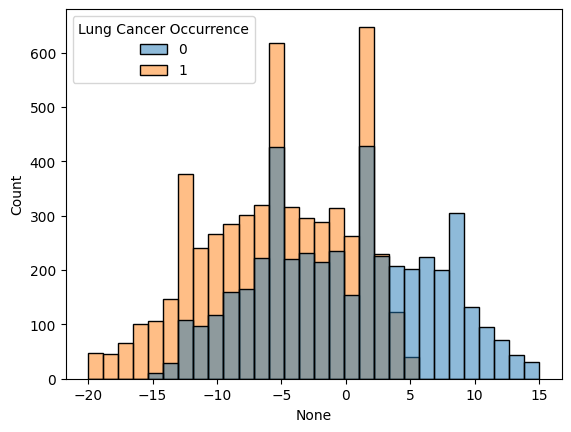

In [55]:
sns.histplot(data=MASTER_DF, x=(MASTER_DF["Current Weight"] - MASTER_DF["Last Weight"]), hue = "Lung Cancer Occurrence", bins=30)

**Observations**

The historgram shows clearly that the patients with lung cancer occurrence seem to be more likely to lose weight as compared to those without. This shows that there are likely to be significant relationship between "change in weight" and "lung cancer occurrence". Therefore, this is one of the engineered feature to consider in this case in place of "Last Weight" and "Current Weight". 

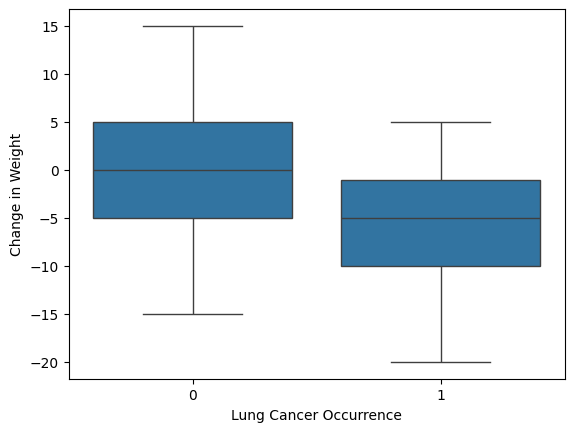

In [56]:
ENGINEERED_IMPUTED_DF = deepcopy(IMPUTED_DF)
ENGINEERED_IMPUTED_DF["Change in Weight"] = ENGINEERED_IMPUTED_DF["Current Weight"] - ENGINEERED_IMPUTED_DF["Last Weight"]
sns.boxplot(data=ENGINEERED_IMPUTED_DF, x='Lung Cancer Occurrence', y='Change in Weight')
plt.show()

**Observations**

Similar to the observation from before where "Current Weight" for positive lung cancer occurrence patients tend to have lower as compared to those with negative outcome, it is even more significantly shown in the boxplot here. It can obsere that the 75% of observations for those with positive lung cancer occurrence is sitting at approximately 0 in weight change, while for those with negative lung cancer occurrence patient, the median is at approximately 0. There are 25% more Patients with lung cancer experiencing weight loss as compared to those without. This reinforces the significance of this engineered feature in being useful to the model.

### 3.2: Year Smoked

"Start Smoking" and "Stop Smoking" by themselves individually logically do not tell us anything interesting about a patient's smoking habit, thus to make it meaningful, it is better to know the total duration the patient has smoked. An interesting data that could make this even more meaningful would be the number of packs/cigarettes the patient has smoked, however since it is not available, I have made the assumption here that all patients smoked the same amount.

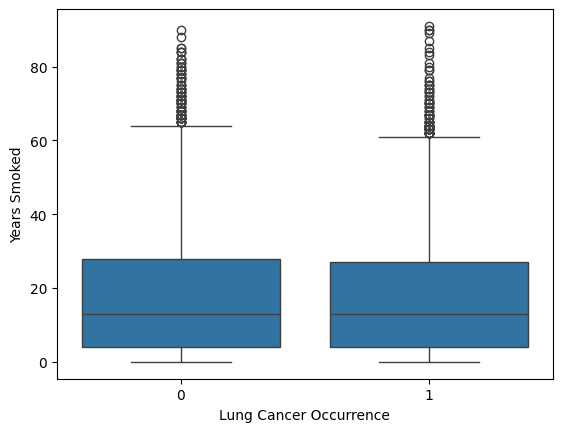

In [57]:
# Before we can find the period, we need to change out the strings values in the data 
mapping = {"Not Applicable": 0, "Still Smoking": CURR_DATE.year}
years_smoked = []
for start, stop in zip(ENGINEERED_IMPUTED_DF["Start Smoking"], ENGINEERED_IMPUTED_DF["Stop Smoking"]):
	if len(start) != 4:
		start = mapping[start]
	if len(stop) != 4:
		stop = mapping[stop]
	years_smoked.append(int(stop)-int(start))
ENGINEERED_IMPUTED_DF["Years Smoked"] = years_smoked
sns.boxplot(data=ENGINEERED_IMPUTED_DF, x='Lung Cancer Occurrence', y='Years Smoked')
plt.show()

**Observations**

From the boxplot, we observed that there are quite a number of outliers in the upper range. This could be due to what we observed earlier in section 2.5.2 when we notice that some of the recorded start year of smoking is same as the patient's birth year, which is illogical. As such, it raises the concern whether we should be using the "Start Smoking" feature, or should we drop those rows with improper data by indicating a minimum threshold for age that its believeable for them to start smoking. This is an issue that have to be handled if we are to use these features as numerical values.

Aside from the outliers, it seems to be that the distribution of data between positive and negative lung cancer occurrence is similar. It does raises a doubt in that does smoking not increase the risk of getting lung cancer? Or it could be because of what I raised earlier, that the information provided by this feature is incomplete in the way that the data on the number of packs/cigarettes smoked in the same period is not given, which might be an important factor in play here. 

### 3.3: Years Smoked (Categorical)

To handle the issue mentioned in 3.2, I decide to consider binning the data with the addition of an assumption:

- Those with their "Start smoking" year being really close to their birth is just a representation that they started really young, as such if I am to bin them in a size of 10 years, the values might be more logical. 

Before I proceed to bin the values, I will have a look at the distribution of the values to determine the appropriate bins to use.

<Axes: xlabel='Years Smoked', ylabel='Count'>

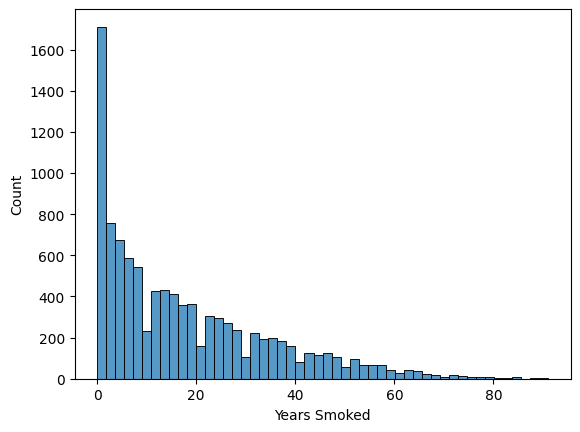

In [58]:
sns.histplot(data=ENGINEERED_IMPUTED_DF, x="Years Smoked", bins=50)

After analyzing the counts in the different periods, to ensure the most equal distribution of data, I concluded that the best way to split will be into the following:

1. Short Term (<= 5 years)
2. Middle Term (> 5 years and <= 20 years)
3. Long Term (> 20 years)

In [59]:
CAT_SMOKER = []

for years in ENGINEERED_IMPUTED_DF["Years Smoked"]:
	if years <= 5:
		CAT_SMOKER.append("Short Term")
	elif years > 5 and years <= 20:
		CAT_SMOKER.append("Middle Term")
	else:
		CAT_SMOKER.append("Long Term")

<Axes: ylabel='Cat Smoker'>

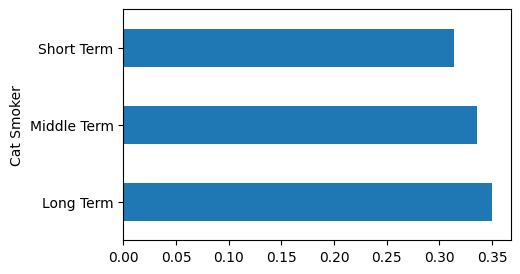

In [60]:
ENGINEERED_IMPUTED_DF["Cat Smoker"] = CAT_SMOKER
ENGINEERED_IMPUTED_DF["Cat Smoker"].value_counts(normalize=True).plot(kind="barh", figsize=(5, 3))

Similar proportions in label distributions. 

<Axes: xlabel='count', ylabel='Cat Smoker'>

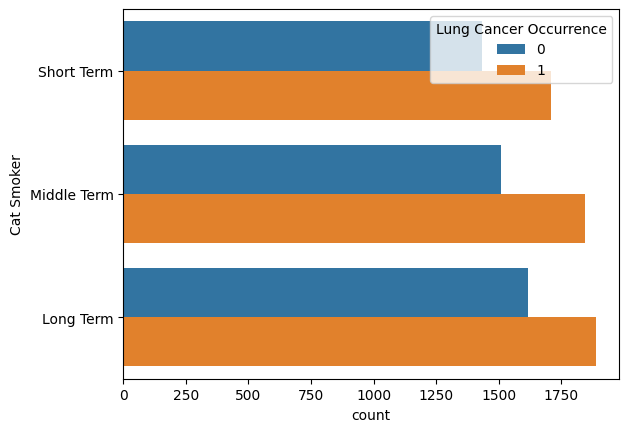

In [61]:
sns.countplot(data=ENGINEERED_IMPUTED_DF, y="Cat Smoker", orient="h", hue="Lung Cancer Occurrence")

From the barchart above, the proportion of positive to negative lung cancer occurrence look to be relatively similar across all the categories. It seems as though the Category of smoker does not really affect outcome of lung cancer.

In [62]:
f'pvalue = {ss.chi2_contingency(pd.crosstab(ENGINEERED_IMPUTED_DF["Lung Cancer Occurrence"], ENGINEERED_IMPUTED_DF["Cat Smoker"]))[1]}'

'pvalue = 0.6669829831670429'

The pvalue > 0.05, indicating a lack of association between the target variable and this feature.

## Conclusion

From the EDA, it can be concluded as follow:

| Feature | Description | Type | Concluding Remarks |
| - | - | - | - |
| ID | Patient ID | Numerical | Not meaningful as a feature as it only serves a patient identifier |
| Age | Age of the patient | Numerical | Show little significance with target variable |
| Gender | Gender of the patient | Categorical | Seems to show some significance with females having higher lung cancer occurrence |
| COPD History | Whether the patient has a history of Chronic Obstructive Pulmonary Disease | Categorical | Collinear with Taken Bronchodilators, show little significance with target variable |
| Genetic Markers | Presence of any genetic markers known to increase the risk of lung cancer | Categorical | Likely to be an important feature |
| Air Pollution Exposure | Level of air pollution exposure in the patient’s daily life | Categorical | Likely to be an important feature |
| Last Weight | Last officially recorded weight of patient | Numerical | Engineered with "Current Weight", omitted as feature |
| Current Weight | Current officially recorded weight of patient | Numerical | Engineered with "Last Weight", omitted as feature |
| Start Smoking | Year that the patient starts smoking | String | Engineered with "Stop Smoking", omitted as feature. Some data values are inconsistent.  |
| Stop Smoking | Year that the patient stops smoking | String | Engineered with "Start Smoking", omitted as feature. |
| Taken Bronchodilators | Whether the patient is previously prescribed Bronchodilator medications | Categorical | Collinear with COPD History, show little significance with target variable |
| Frequency of Tiredness | Frequency of patient feeling tiredness in a day | Categorical | Show little significance with target variable |
| Dominant Hand | Dominant hand of the patient | Categorical | Show little significance with target variable |
| Lung Cancer Occurrence | Whether the patient has lung cancer or not | Categorical | Target Variable |
| Change in Weight | "Current Weight" - "Last Weight" | Numerical | Engineered Feature, show large significance with target variable, might be an important feature |
| Years Smoked | "Stop Smoking" - "Start Smoking" | Numerical | Engineered Feature, show little significance with target variable, engineered from a "Start Smoking" which has some inconsistencies in data |
| Cat Smoker | "Years Smoked" binned into categories | Categorical | Engineered Feature, show little significance with target variable, engineered from a "Start Smoking" which has some inconsistencies in data |